In [1]:
import ccxt
import numpy as np
import pandas as pd
import datetime as dt
from dateutil import tz
import matplotlib.pyplot as plt

import json
import time
import os
import sys

In [2]:
src_path = '../src/'
sys.path.append(os.path.abspath(src_path))
import func_get
import func_signal
import func_backtest

In [3]:
start_ts = time.time()

In [4]:
interval_dict = {
    '1m': 1,
    '5m': 5,
    '15m': 15,
    '30m': 30,
    '1h': 60,
    '2h': 120,
    '4h': 240,
    '1d': 1440
}

In [5]:
with open('../../../_keys/ftx/ftx_read_keys.json') as keys_file:
    keys_dict = json.load(keys_file)
    
exchange = ccxt.ftx({'apiKey': keys_dict['apiKey'],
                     'secret': keys_dict['secret'],
                     'enableRateLimit': True})

### Config

In [6]:
project_name = 'cryptoris_30m'

In [7]:
start_date = dt.datetime(2022, 1, 1)
start_hour = 0
end_date = dt.datetime.today() - dt.timedelta(days=1)
reinvest_profit_flag = True

In [8]:
config_params = {
    'safety_ohlcv_range': 1000,
    'action_timeframe': '30m',
    'target_side': ['buy', 'sell'],
    'base': {
        'symbol': ['ETH-PERP', 'SOL-PERP', 'LUNA-PERP'],
        'open': {
            '30m': {
                'ema': {
                    'check': ['check_signal_side'],
                    'look_back': 1,
                    'windows': 200,
                    'revert': False
                },
                'supertrend': {
                    'check': ['check_signal_side_change'],
                    'look_back': 1,
                    'atr_range': 10,
                    'multiplier': 3,
                    'revert': False
                },
                'wt': {
                    'check': ['check_signal_band'],
                    'trigger': 'inner',
                    'channel_range': 10,
                    'average_range': 21,
                    'overbought': 53,
                    'oversold': -53,
                    'revert': False
                }
            },
            '1h': {
                'ema': {
                    'check': ['check_signal_side'],
                    'look_back': 1,
                    'windows': 200,
                    'revert': False
                },
                'supertrend': {
                    'check': ['check_signal_side'],
                    'look_back': 1,
                    'atr_range': 10,
                    'multiplier': 3,
                    'revert': False
                },
                'wt': {
                    'check': ['check_signal_band'],
                    'trigger': 'inner',
                    'channel_range': 10,
                    'average_range': 21,
                    'overbought': 53,
                    'oversold': -53,
                    'revert': False
                }        
            }    
            
        },
        'close': {
            '30m': {
                'supertrend': {
                    'check': ['check_signal_side'],
                    'look_back': 0,
                    'atr_range': 10,
                    'multiplier': 3,
                    'revert': False
                },
                'wt': {
                    'check': ['check_signal_band'],
                    'trigger': 'inner',
                    'channel_range': 10,
                    'average_range': 21,
                    'overbought': 53,
                    'oversold': -53,
                    'revert': False
                }    
            }
        }
    },
    'lead': {
        'symbol': ['BTC-PERP'],
        'open': {
            '30m': {
                'wt': {
                    'check': ['check_signal_band'],
                    'trigger': 'inner',
                    'channel_range': 10,
                    'average_range': 21,
                    'overbought': 53,
                    'oversold': -53,
                    'revert': False
                }
            }
        },
        'close': {
        }
    },
    'tp': {
        'stop_percent': 50,
        'price_percent': 5,
        'signal': None,
    },
    'sl': {
        'stop_percent': 50,
        'price_percent': None,
        'signal': {
            'timeframe': '30m',
            'signal': {
                'supertrend': {
                    'look_back': 0,
                    'atr_range': 10,
                    'multiplier': 3,
                    'revert': False
                }
            }
        }
    },
    'action_percent': 10,
    'leverage': 5,
    'taker_fee_percent': 0.07
}

### Get data

In [9]:
ohlcv_df_dict = func_get.get_data(exchange, start_date, end_date, start_hour, interval_dict, config_params)

base: timeframe 1/2 symbol 1/3 date 1/149
base: timeframe 1/2 symbol 1/3 date 2/149
base: timeframe 1/2 symbol 1/3 date 3/149
base: timeframe 1/2 symbol 1/3 date 4/149
base: timeframe 1/2 symbol 1/3 date 5/149
base: timeframe 1/2 symbol 1/3 date 6/149
base: timeframe 1/2 symbol 1/3 date 7/149
base: timeframe 1/2 symbol 1/3 date 8/149
base: timeframe 1/2 symbol 1/3 date 9/149
base: timeframe 1/2 symbol 1/3 date 10/149
base: timeframe 1/2 symbol 1/3 date 11/149
base: timeframe 1/2 symbol 1/3 date 12/149
base: timeframe 1/2 symbol 1/3 date 13/149
base: timeframe 1/2 symbol 1/3 date 14/149
base: timeframe 1/2 symbol 1/3 date 15/149
base: timeframe 1/2 symbol 1/3 date 16/149
base: timeframe 1/2 symbol 1/3 date 17/149
base: timeframe 1/2 symbol 1/3 date 18/149
base: timeframe 1/2 symbol 1/3 date 19/149
base: timeframe 1/2 symbol 1/3 date 20/149
base: timeframe 1/2 symbol 1/3 date 21/149
base: timeframe 1/2 symbol 1/3 date 22/149
base: timeframe 1/2 symbol 1/3 date 23/149
base: timeframe 1/2 

base: timeframe 1/2 symbol 2/3 date 42/149
base: timeframe 1/2 symbol 2/3 date 43/149
base: timeframe 1/2 symbol 2/3 date 44/149
base: timeframe 1/2 symbol 2/3 date 45/149
base: timeframe 1/2 symbol 2/3 date 46/149
base: timeframe 1/2 symbol 2/3 date 47/149
base: timeframe 1/2 symbol 2/3 date 48/149
base: timeframe 1/2 symbol 2/3 date 49/149
base: timeframe 1/2 symbol 2/3 date 50/149
base: timeframe 1/2 symbol 2/3 date 51/149
base: timeframe 1/2 symbol 2/3 date 52/149
base: timeframe 1/2 symbol 2/3 date 53/149
base: timeframe 1/2 symbol 2/3 date 54/149
base: timeframe 1/2 symbol 2/3 date 55/149
base: timeframe 1/2 symbol 2/3 date 56/149
base: timeframe 1/2 symbol 2/3 date 57/149
base: timeframe 1/2 symbol 2/3 date 58/149
base: timeframe 1/2 symbol 2/3 date 59/149
base: timeframe 1/2 symbol 2/3 date 60/149
base: timeframe 1/2 symbol 2/3 date 61/149
base: timeframe 1/2 symbol 2/3 date 62/149
base: timeframe 1/2 symbol 2/3 date 63/149
base: timeframe 1/2 symbol 2/3 date 64/149
base: timef

base: timeframe 1/2 symbol 3/3 date 83/149
base: timeframe 1/2 symbol 3/3 date 84/149
base: timeframe 1/2 symbol 3/3 date 85/149
base: timeframe 1/2 symbol 3/3 date 86/149
base: timeframe 1/2 symbol 3/3 date 87/149
base: timeframe 1/2 symbol 3/3 date 88/149
base: timeframe 1/2 symbol 3/3 date 89/149
base: timeframe 1/2 symbol 3/3 date 90/149
base: timeframe 1/2 symbol 3/3 date 91/149
base: timeframe 1/2 symbol 3/3 date 92/149
base: timeframe 1/2 symbol 3/3 date 93/149
base: timeframe 1/2 symbol 3/3 date 94/149
base: timeframe 1/2 symbol 3/3 date 95/149
base: timeframe 1/2 symbol 3/3 date 96/149
base: timeframe 1/2 symbol 3/3 date 97/149
base: timeframe 1/2 symbol 3/3 date 98/149
base: timeframe 1/2 symbol 3/3 date 99/149
base: timeframe 1/2 symbol 3/3 date 100/149
base: timeframe 1/2 symbol 3/3 date 101/149
base: timeframe 1/2 symbol 3/3 date 102/149
base: timeframe 1/2 symbol 3/3 date 103/149
base: timeframe 1/2 symbol 3/3 date 104/149
base: timeframe 1/2 symbol 3/3 date 105/149
base:

base: timeframe 2/2 symbol 1/3 date 124/149
base: timeframe 2/2 symbol 1/3 date 125/149
base: timeframe 2/2 symbol 1/3 date 126/149
base: timeframe 2/2 symbol 1/3 date 127/149
base: timeframe 2/2 symbol 1/3 date 128/149
base: timeframe 2/2 symbol 1/3 date 129/149
base: timeframe 2/2 symbol 1/3 date 130/149
base: timeframe 2/2 symbol 1/3 date 131/149
base: timeframe 2/2 symbol 1/3 date 132/149
base: timeframe 2/2 symbol 1/3 date 133/149
base: timeframe 2/2 symbol 1/3 date 134/149
base: timeframe 2/2 symbol 1/3 date 135/149
base: timeframe 2/2 symbol 1/3 date 136/149
base: timeframe 2/2 symbol 1/3 date 137/149
base: timeframe 2/2 symbol 1/3 date 138/149
base: timeframe 2/2 symbol 1/3 date 139/149
base: timeframe 2/2 symbol 1/3 date 140/149
base: timeframe 2/2 symbol 1/3 date 141/149
base: timeframe 2/2 symbol 1/3 date 142/149
base: timeframe 2/2 symbol 1/3 date 143/149
base: timeframe 2/2 symbol 1/3 date 144/149
base: timeframe 2/2 symbol 1/3 date 145/149
base: timeframe 2/2 symbol 1/3 d

base: timeframe 2/2 symbol 3/3 date 16/149
base: timeframe 2/2 symbol 3/3 date 17/149
base: timeframe 2/2 symbol 3/3 date 18/149
base: timeframe 2/2 symbol 3/3 date 19/149
base: timeframe 2/2 symbol 3/3 date 20/149
base: timeframe 2/2 symbol 3/3 date 21/149
base: timeframe 2/2 symbol 3/3 date 22/149
base: timeframe 2/2 symbol 3/3 date 23/149
base: timeframe 2/2 symbol 3/3 date 24/149
base: timeframe 2/2 symbol 3/3 date 25/149
base: timeframe 2/2 symbol 3/3 date 26/149
base: timeframe 2/2 symbol 3/3 date 27/149
base: timeframe 2/2 symbol 3/3 date 28/149
base: timeframe 2/2 symbol 3/3 date 29/149
base: timeframe 2/2 symbol 3/3 date 30/149
base: timeframe 2/2 symbol 3/3 date 31/149
base: timeframe 2/2 symbol 3/3 date 32/149
base: timeframe 2/2 symbol 3/3 date 33/149
base: timeframe 2/2 symbol 3/3 date 34/149
base: timeframe 2/2 symbol 3/3 date 35/149
base: timeframe 2/2 symbol 3/3 date 36/149
base: timeframe 2/2 symbol 3/3 date 37/149
base: timeframe 2/2 symbol 3/3 date 38/149
base: timef

lead: timeframe 1/1 symbol 1/1 date 57/149
lead: timeframe 1/1 symbol 1/1 date 58/149
lead: timeframe 1/1 symbol 1/1 date 59/149
lead: timeframe 1/1 symbol 1/1 date 60/149
lead: timeframe 1/1 symbol 1/1 date 61/149
lead: timeframe 1/1 symbol 1/1 date 62/149
lead: timeframe 1/1 symbol 1/1 date 63/149
lead: timeframe 1/1 symbol 1/1 date 64/149
lead: timeframe 1/1 symbol 1/1 date 65/149
lead: timeframe 1/1 symbol 1/1 date 66/149
lead: timeframe 1/1 symbol 1/1 date 67/149
lead: timeframe 1/1 symbol 1/1 date 68/149
lead: timeframe 1/1 symbol 1/1 date 69/149
lead: timeframe 1/1 symbol 1/1 date 70/149
lead: timeframe 1/1 symbol 1/1 date 71/149
lead: timeframe 1/1 symbol 1/1 date 72/149
lead: timeframe 1/1 symbol 1/1 date 73/149
lead: timeframe 1/1 symbol 1/1 date 74/149
lead: timeframe 1/1 symbol 1/1 date 75/149
lead: timeframe 1/1 symbol 1/1 date 76/149
lead: timeframe 1/1 symbol 1/1 date 77/149
lead: timeframe 1/1 symbol 1/1 date 78/149
lead: timeframe 1/1 symbol 1/1 date 79/149
lead: timef

### Add signal

In [10]:
ohlcv_df_dict = func_signal.add_signal(start_date, ohlcv_df_dict, interval_dict, config_params)

base add ema to ETH-PERP 30m
base add supertrend to ETH-PERP 30m
base add wt to ETH-PERP 30m
base add ema to SOL-PERP 30m
base add supertrend to SOL-PERP 30m
base add wt to SOL-PERP 30m
base add ema to LUNA-PERP 30m
base add supertrend to LUNA-PERP 30m
base add wt to LUNA-PERP 30m
base add ema to ETH-PERP 1h
base add supertrend to ETH-PERP 1h
base add wt to ETH-PERP 1h
base add ema to SOL-PERP 1h
base add supertrend to SOL-PERP 1h
base add wt to SOL-PERP 1h
base add ema to LUNA-PERP 1h
base add supertrend to LUNA-PERP 1h
base add wt to LUNA-PERP 1h
lead add wt to BTC-PERP 30m


### Back test

In [11]:
action_time_list = func_get.gen_action_time_list(config_params, ohlcv_df_dict)
max_open_timeframe = func_backtest.get_max_open_timeframe(config_params, interval_dict)

In [12]:
budget = 100

transaction_dict = {
    'symbol': [],
    'side': [],
    'amount': [],
    'open_time': [],
    'open_price': [],
    'close_time': [],
    'close_price': [],
    'value': [],
    'notional': [],
    'profit': [],
    'profit_percent': []
}

position_dict = {}

if reinvest_profit_flag == True:
    budget_dict = {
        'time': [],
        'budget': []
    }
    
max_drawdown = 0

In [13]:
if reinvest_profit_flag == True:
    min_budget = budget

time_count = 0

for signal_time in action_time_list:
    action_time = signal_time + dt.timedelta(minutes=interval_dict[config_params['action_timeframe']])
    
    time_count += 1
    print(f"Time {action_time}: progress {time_count}/{len(action_time_list)}")

    '''
    Close positions
    '''
    for symbol in [x for x in position_dict.keys()]:
        print(f"  {symbol}")
        budget, max_drawdown, position_dict, transaction_dict = func_backtest.close_position(symbol, signal_time, max_drawdown, config_params, budget, reinvest_profit_flag, ohlcv_df_dict, position_dict, transaction_dict, interval_dict)

    '''
    Open positions
    '''
    max_position = int(1 / (config_params['action_percent'] / 100))

    for symbol in [x for x in config_params['base']['symbol'] if x not in position_dict.keys()][:max_position]:
        print(f"  {symbol}")
        position_dict = func_backtest.open_position(symbol, signal_time, max_open_timeframe, config_params, budget, ohlcv_df_dict, position_dict, interval_dict)    
    
    '''
    Update budget
    '''
    if reinvest_profit_flag == True:
        budget_dict['time'].append(signal_time)
        budget_dict['budget'].append(budget)

        if budget < min_budget:
            min_budget = budget

    if budget <= 0:
        print(f"Out of money at {action_time}")
        break
        
'''
Clear final position
'''
opened_symbol = list(position_dict.keys())

for symbol in opened_symbol:
    print(f" Clear {symbol} position")
    
    side = position_dict[symbol]['side']
    ohlcv_df = ohlcv_df_dict['base'][config_params['action_timeframe']][symbol]
    current_ohlcv_df = ohlcv_df[ohlcv_df['time'] == signal_time].reset_index(drop=True)
    close_price = current_ohlcv_df.loc[0, 'close']
    close_percent = 100
    
    budget, position_dict, transaction_dict = func_backtest.update_close_position(symbol, side, close_price, close_percent, signal_time, config_params, budget, reinvest_profit_flag, position_dict, transaction_dict, interval_dict)

Time 2022-01-01 00:30:00: progress 1/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: sell
     base ETH-PERP check_signal_band wt 30m: sell
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: sell
     base SOL-PERP check_signal_band wt 30m: sell
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: sell
     base LUNA-PERP check_signal_band 

     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-01 05:30:00: progress 11/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SO

     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-01-01 15:00:00: progress 30/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signa

     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-01-01 19:00:00: progress 38/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m

     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-02 03:30:00: progress 55/5136
  ETH-PERP
     base ETH-PERP

     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-01-02 07:30:00: progress 63/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_

     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-02 15:00:00: progress 78/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band w

     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-02 19:00:00: progress 86/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PER

     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_sign

     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-0

     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-01-03 18:30:00: progress 133/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base E

     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-01-03 22:30:00: progress 141/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-P

     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-01-04 07:00:00: progress 158/5136
  ETH-PERP
     bas

     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-01-04 10:30:00: progress 165/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     bas

     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-01-04 17:30:00: progress 179/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_b

     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-01-04 22:00:00: progress 188/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_sid

     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-05 07:30:00: progress 207/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PE

     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-05 12:00:00: progress 216/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PE

     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: sell
     base LUNA-PERP check_signal_band wt 30m: sell
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     sell: 0.59304835002179
     price: 84.847
     tp: 80.60464999999999
     sl: 87.51789996741883
Time 2022-01-05 20:00:00: progress 232/5136
  LUNA-PERP
     base LUNA-PERP check_signal_side supertrend 30m: sell
     base LUNA-PERP check_signal_band wt 30m: sell
     Not close
     Update sl: 86.91765997067695
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-

     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-06 00:30:00: progress 241/5136
  LUNA-PERP
     base LUNA-PERP check_signal_side supertrend 30m: sell
     base LUNA-PERP check_signal_band wt 30m: sell
     Not close
     Update sl: 86.0223052058504
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_si

     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     bas

     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-06 11:30:00: progress 263/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base S

     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     b

     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-01-07 00:30:00: progress 289/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signa

     lead BTC-PERP check_signal_band wt 30m: sell
     sell: 0.3491098136536661
     price: 145.95
     tp: 138.65249999999997
     sl: 152.8636131951399
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: sell
     base LUNA-PERP check_signal_band wt 30m: sell
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     sell: 0.6663080594056827
     price: 76.47
     tp: 72.64649999999999
     sl: 79.95024531893019
Time 2022-01-07 08:30:00: progress 305/5136
  SOL-PERP
     base SOL-PERP check_signal_side supertrend 30m: sell
     base SOL-PERP check_signal_band wt 30m: sell
     Not close
     Update sl: 151.8656268756259
  LUNA-PERP
     base LUNA-PERP check_signal_side supertrend 30m: sell
     base LUNA-PERP check_signal_band wt 30m: sell
     Not close
     

     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-07 13:00:00: progress 314/5136
  LUNA-PERP
     base LUNA-PERP check_signal_side supertrend 30m: sell
     base LUNA-PERP check_signal_band wt 30m: sell
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     ba

     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-01-07 22:30:00: progress 333/5136
  LUNA-PERP
     base LUNA-PERP check_signal_side supertrend 30m: sell
     base LUNA-PERP check_signal_band wt 30m: sell
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     

     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-01-08 12:30:00: progress 361/5136
  LUNA-PERP
     base LUNA-PERP check_signal_side supertrend 30m: sell
     base LUNA-PERP check_signal_band wt 30m: sell
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
   

     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-08 17:30:00: progress 371/5136
  LUNA-PERP
     base LUNA-PERP check_signal_side supertrend 30m: sell
     base LUNA-PERP check_signal_band wt 30m: sell
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     b

     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-09 02:30:00: progress 389/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_ba

     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-09 06:30:00: progress 397/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signa

     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-09 15:30:00: progress 415/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_sign

     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-09 19:00:00: progress 422/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-

     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-10 03:00:00: progress 438/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-

     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-01-10 07:30:00: progress 447/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH

     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-10 17:00:00: progress 466/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band 

     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-10 21:00:00: progress 474/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SO

     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-01-11 05:30:00: progress 491/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     bas

     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-01-11 09:00:00: progress 498/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     bas

     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-11 16:30:00: progress 513/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PE

     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-11 20:30:00: progress 521/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band w

     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-12 06:30:00: progress 541/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PE

     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-12 10:30:00: progress 549/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PE

     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-01-12 19:00:00: progress 566/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-P

     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-01-13 04:00:00: progress 584/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP

     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-01-13 08:00:00: progress 592/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band w

     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-

     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-13 21:00:00: progress 618/5136
  ETH-PERP
     base ETH-PERP c

     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_

     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     ba

     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-01-14 18:00:00: progress 660/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base S

     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-01-14 21:30:00: progress 667/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_sign

     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-15 06:00:00: progress 684/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-

     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-15 09:00:00: progress 690/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PER

     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-1

     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-15 21:00:00: progress 714/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-

     base ETH-PERP check_signal_band wt 30m: buy
     Not close
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-01-16 07:30:00: progress 735/5136
  ETH-PERP
     base ETH-PERP check_signal_side supertrend 30m: buy
     b

     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-16 11:30:00: progress 743/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-

     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-16 19:30:00: progress 759/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP

     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-17 09:30:00: progress 787/5136
  ETH-PERP
     base ETH-PERP check_signal_side supertrend 30m: buy
     base ETH-PERP check_signal_band wt 30m: buy
     Not close
  LUNA-PERP
     base LUNA-PERP check_signal_side supertrend 30m: buy
     base LUNA-PERP check_signal_band wt 30m: buy
     Not close
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
   

     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     b

     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-17 22:30:00: progress 813/5136
  ETH-PERP
     base E

     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-18 02:00:00: progress 820/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_ba

     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 202

     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-18 13:30:00: progress 843/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SO

     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_

     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-01-19 04:00:00: progress 872/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     bas

     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-19 12:00:00: progress 888/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_ba

     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-19 23:30:00: progress 911/5136
  ETH-PERP
     base ETH-P

     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-20 03:00:00: progress 918/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ET

     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-20 11:00:00: progress 934/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_

     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-01-20 23:00:00: progress 958/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band w

     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-01-21 02:30:00: progress 965/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP 

     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     b

     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-01-21 15:30:00: progress 991/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signa

     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-21 23:30:00: progress 1007/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: buy
     base SOL-PERP check_signal_band wt 30m: buy
     base SOL-PERP chec

     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-22 03:30:00: progress 1015/5136
  ETH-PERP
     base

     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-22 12:00:00: progress 1032/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_b

     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-22 15:30:00: progress 1039/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base 

     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-01-22 23:00:00: progress 1054/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     bas

     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-23 03:00:00: progress 1062/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_sig

     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-23 11:30:00: progress 1079/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signa

     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-23 15:00:00: progress 1086/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_sign

     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-23 23:00:00: progress 1102/5136
  ETH-PERP
     base ETH-PERP check_signal_side supertrend 30m: sell
     base ETH-PERP check_signal_band wt 30m: sell
     Not close
     Update 

     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-24 04:00:00: progress 1112/5136
  ETH-PERP
     base ETH-PERP check_signal_side supertrend 30m: sell
     base ETH-PERP check_signal_band wt 30m: sell
     Not close
  SOL-PERP
     base SOL-PERP check_signal_side supertrend 30m: sell
     base SOL-PERP check_signal_band wt 30m: sell
     Not close
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-24 04:30:00: progress 1113/5136
  ETH-PER

     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-24 14:30:00: progress 1133/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: sell
     base ETH-PERP check_signal_band wt 30m: sell
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     sell: 0.023067308459568836
     price: 2417.7
     tp: 2296.8149999999996
     sl: 2503.1867799867973
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead

     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP chec

     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_sign

     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base 

     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-25 18:00:00: progress 1188/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ET

     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-01-26 02:00:00: progress 1204/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base 

     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-01-26 13:00:00: progress 1226/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal

     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_sign

     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-27 00:30:00: progress 1249/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base S

     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PER

     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP ch

     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-01-27 23:30:00: progress 1295/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signa

     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-01-28 14:00:00: progress 1324/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base E

     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-01-28 17:30:00: progress 1331/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_si

     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     

     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-01-29 13:30:00: progress 1371/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PE

     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-01-29 17:00:00: progress 1378/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_sign

     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-01-30 00:30:00: progress 1393/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP 

     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-30 13:30:00: progress 1419/5136
  LUNA-PERP
     base LUNA-PERP check_signal_side supertrend 30m: sell
     base LUNA-PERP check_signal_band wt 30m: sell
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base S

     base LUNA-PERP check_signal_side supertrend 30m: sell
     base LUNA-PERP check_signal_band wt 30m: sell
     Not close
     Update sl: 51.687300037161904
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-30 18:00:00: progres

     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LU

     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-31 13:00:00: progress 1466/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal

     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
    

     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-02-01 00:00:00: progress 1488/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP ch

     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-02-01 12:00:00: progress 1512/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_sid

     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-02-01 15:30:00: progress 1519/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_sid

     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-02-01 23:00:00: progress 1534/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_ban

     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-02-02 10:00:00: progress 1556/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP ch

     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-02-02 13:30:00: progress 1563/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP ch

     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_s

     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-02-03 09:00:00: progress 1602/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base 

     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-02-03 12:30:00: progress 1609/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_si

     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-02-03 20:00:00: progress 1624/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_

     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-02-04 07:30:00: progress 1647/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH

     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-02

     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base L

     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-02-05 05:00:00: progress 1690/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side 

     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-02-05 08:30:00: progress 1697/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PE

     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-02-05 16:00:00: progress 1712/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_b

     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-02-06 02:30:00: progress 1733/5136
  ETH-PERP
     base ETH-PERP 

     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-02-06 06:00:00: progress 1740/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP che

     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-02-06 13:00:00: progress 1754/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP ch

     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-02-07 00:00:00: progress 1776/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-

     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_

     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-02-07 15:00:00: progress 1806/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP c

     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-02-07 22:30:00: progress 1821/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP che

     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-

     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-02-08 13:00:00: progress 1850/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP che

     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-02-08 20:30:00: progress 1865/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_

     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_

     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-02-09 11:00:00: progress 1894/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_b

     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-02-09 18:30:00: progress 1909/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal

     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-02-10 06:00:00: progress 1932/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_si

     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-02-10 16:00:00: progress 1952/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP

     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-02-11 03:00:00: progress 1974/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base S

     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     ba

     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-02-11 23:30:00: progress 2015/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal

     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-02-12 11:00:00: progress 2038/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA

     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
    

     base ETH-PERP check_signal_band wt 30m: sell
     Not close
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-02-13 09:30:00: progress 2083/5136
  ETH-PERP
     base ETH-PERP check_signal_side supertrend 30m: sell
 

     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-02-13 21:30:00: progress 2107/5136
  ETH-PERP
     base ETH-PERP check_signal_side supertrend 30m: sell
     base ETH-PERP check_signal_band wt 30m: sell
     Not close
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
 

     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-02-14 10:30:00: progress 2133/5136
  ETH-PERP
     base ETH-PERP check_signal_side supertrend 30m: sell
     base ETH-PERP check_signal_band wt 30m: sell
     Not close
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
   

     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-02-1

     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-02-15 11:00:00: progress 2182/5136
  LUNA-PERP
     base LUNA-PERP check_signal_side supertrend 30m: buy
     base LUNA-PERP check_signal_band wt 30m: buy
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base 

     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-02-15 22:30:00: progress 2205/5136
  ETH-PERP
     base ETH-

     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-02-16 09:30:00: progress 2227/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PE

     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-02-16 12:30:00: progress 2233/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP chec

     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_s

     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-02-17 07:00:00: progress 2270/5136
  ETH-PERP
     base ETH-PERP check_signal_side supertrend 30m: buy
     base ETH-PERP check_signal_band wt 30m: buy
     Not close
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: sell
   

     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-02-17 20:30:00: progress 2297/5136
  SOL-PERP
     base SOL-PERP check_signal_side supertrend 30m: sell
     base SOL-PERP check_signal_band wt 30m: sell
     Not close
     Update sl: 101.48990764458317
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check

     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-02-18 00:00:00: progress 2304/5136
  ETH-PERP
     base ET

     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP 

     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-02-18 17:30:00: progress 2339/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_s

     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     bas

     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
    

     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-02-19 18:30:00: progress 2389/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_sig

     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-02-20 01:30:00: progress 2403/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-

     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-02-20 12:00:00: progress 2424/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_ban

     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     b

     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-02-21 02:30:00: progress 2453/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     b

     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-02-21 09:30:00: progress 2467/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP c

     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-02-21 20:30:00: progress 2489/5136
  SOL-PERP
     base SOL-PERP check_signal_side supertrend 30m: sell
     base SOL-PERP check_signal_band wt 30m: sell
     Not close
     Upda

     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-02-22 08:30:00: progress 2513/5136
  ETH-PERP
     base ETH-PERP check_signal_side supertrend 30m: sell
     base ETH-PERP check_signal_band wt 30m: sell
     Not close
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
 

     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 202

     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-02-23 07:00:00: progress 2558/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PER

     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-0

     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-02-23 17:30:00: progress 2579/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base S

     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-02-24 04:30:00: progress 2601/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH

     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-02-24 07:30:00: progress 2607/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LU

     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-02-24 14:30:00: progress 2621/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_ba

     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-02-25 01:30:00: progress 2643/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL

     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-02-25 05:00:00: progress 2650/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL

     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-02-25 11:30:00: progress 2663/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PE

     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_

     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-02-26 08:30:00: progress 2705/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH

     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-02-26 19:00:00: progress 2726/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt

     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-02-27 05:00:00: progress 2746/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PER

     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     ba

     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-02-27 19:00:00: progress 2774/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side s

     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-02-28 02:00:00: progress 2788/5136
  ETH-PERP
     base ETH-

     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-02-28 12:30:00: progress 2809/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base 

     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-02-28 16:00:00: progress 2816/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base

     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-02-28 22:30:00: progress 2829/5136
  ETH-PERP
     base ETH-PERP check_signal_side supertrend 30m: buy
     base ETH-PERP check_signal_band wt 30m: buy
     Not close
     Update sl: 2652.8206059518134
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP che

     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-01 09:30:00: progress 2851/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH

     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_ba

     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-01 19:30:00: progress 2871/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt

     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-03-02 06:00:00: progress 2892/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band w

     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-03-02 09:30:00: progress 2899/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PER

     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-02 18:00:00: progress 2916/5136
  LUNA-PERP
     base LUNA-PERP check_signal_side supertrend 30m: buy
     base LUNA-PERP check_signal_band wt 30m: buy
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side supertrend 30m: buy
     base ETH-PERP check_signal_band wt 30m: buy
     Not close
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-02 18:30:00: progress 2917/5136
  LUNA-PERP
     base LUNA-PERP check_signal_side supertrend 30m: buy
     base LUNA-PERP check_signal_band wt 30m: buy
    

     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-03-03 07:

     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-03-03 10:30:00: progress 2949/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1

     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-

     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-04 03:30:00: progress 2983/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PE

     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-04 14:00:00: progress 3004/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_s

     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_s

     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-03-05 09:30:00: progress 3043/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_sid

     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-03-05 13:00:00: progress 3050/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_ba

     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-05 20:00:00: progress 3064/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal

     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-03-06 06:30:00: progress 3085/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_ba

     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-03-06 10:00:00: progress 3092/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signa

     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-03-06 16:30:00: progress 3105/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_sign

     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-07 02:30:00: progress 3125/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_

     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-03-07 13:30:00: progress 3147/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_sign

     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-07 23:30:00: progress 3167/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     bas

  ETH-PERP
     base ETH-PERP check_signal_side supertrend 30m: sell
     base ETH-PERP check_signal_band wt 30m: sell
     Not close
     Update sl: 2568.388880440017
  LUNA-PERP
     base LUNA-PERP check_signal_side supertrend 30m: sell
     base LUNA-PERP check_signal_band wt 30m: sell
     Not close
     Update sl: 81.55552195589978
  SOL-PERP
     base SOL-PERP check_signal_side supertrend 30m: sell
     base SOL-PERP check_signal_band wt 30m: sell
     Not close
     Update sl: 84.57009295527263
Time 2022-03-08 03:30:00: progress 3175/5136
  ETH-PERP
     base ETH-PERP check_signal_side supertrend 30m: sell
     base ETH-PERP check_signal_band wt 30m: sell
     Not close
     Update sl: 2558.904992396015
  LUNA-PERP
     base LUNA-PERP check_signal_side supertrend 30m: sell
     base LUNA-PERP check_signal_band wt 30m: sell
     Not close
     Update sl: 81.4115197603098
  SOL-PERP
     base SOL-PERP check_signal_side supertrend 30m: sell
     base SOL-PERP check_signal_band wt 3

     base SOL-PERP check_signal_band wt 30m: sell
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-08 16:30:00: progress 3201/5136
  SOL-PERP
     base SOL-PERP check_signal_side supertrend 30m: sel

     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-09 04:30:00: progress 3225/5136
  SOL-PERP
     base SOL-PERP check_signal_side supertrend 30m: sell
     base SOL-PERP check_signal_band wt 30m: sell
     Not close
  ETH-PERP
    

     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-0

     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-10 01:00:00: progress 3266/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP ch

     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check

     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PER

     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-11 08:00:00: progress 3328/5136
  LUNA-PERP
     base LUNA-PERP check_signal_side supertrend 30m: buy
     base LUNA-PERP check_signal_band wt 30m: buy
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
    

     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-0

     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-03-12 05:00:00: progress 3370/5136
  SOL-PERP
     base SOL-PERP check_signal_side supertrend 30m: sell
     base SOL-PERP check_signal_band wt 30m: sell
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: buy
 

     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-12 17:00:00: progress 3394/5136
  SOL-PERP
     base SOL-PERP check_signal_side supertrend 30m: sell
     base SOL-PERP check_signal_band wt 30m: sell
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action

     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-13 05:00:00: progress 3418/5136
  SOL-PERP
     base SOL-PERP check_signal_side supertrend 30m: sell
     base SOL-PERP check_signal_band wt 30m: sell
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell

     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-13 16:00:00: progress 3440/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base E

     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-14 04:30:00: progress 3465/5136
  LUNA-PERP
     base LUNA-PERP check_signal_side supertrend 30m: buy
     base LUNA-PERP check_signal_band wt 30m: buy
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
    

     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-14 14:30:00: progress 3485/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_si

     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-03-14 23:30:00: progress 3503/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PER

     base LUNA-PERP check_signal_side supertrend 30m: buy
     base LUNA-PERP check_signal_band wt 30m: buy
     Not close
     Update sl: 90.50503287459907
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-03-15 08:00:00: progress

     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-03-15 16:30:00: progress 3537/5136
  LUNA-PERP
     base LUNA-PERP check_signal_side supertrend 30m: buy
     base LUNA-PERP check_signal_band wt 30m: buy
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     ba

     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-03-16 00:30:00: progress 3553/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PE

     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LU

     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-16 16:00:00: progress 3584/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side 

     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-17 00:00:00: progress 3600/5136
  ETH-PERP
     base ET

     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-17 08:30:00: progress 3617/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_ban

     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-17 17:00:00: progress 3634/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side 

     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-18 00:30:00: progress 3649/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signa

     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check

     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-03-18 17:00:00: progress 3682/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP c

     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-19 01:30:00: progress 3699/5136
  SOL-PERP
     base SOL-PERP check_signal_side supertrend 30m: buy
     base SOL-PERP check_signal_band wt 30m: buy
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
   

     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-03-19 11:30:00: progress 3719/5136
  SOL-PERP
     base SOL-PERP check_signal_side supertrend 30m: buy
     base SOL-PERP check_signal_band wt 30m: buy
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     ba

     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-03-19 20:30:00: progress 3737/5136
  SOL-PERP
     base SOL-PERP check_signal_side supertrend 30m: buy
     base SOL-PERP check_signal_band wt 30m: buy
     Not close
     Update sl: 89.61818134397845
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_

     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-20 04:30:00: progress 3753/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL

     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_si

     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-03-20 23:00:00: progress 3790/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP che

     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-03-21 08:30:00: progress 3809/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_b

     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-03-21 18:30:00: progress 3829/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PER

     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-03-22 04:30:00: progress 3849/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_sid

     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-22 14:00:00: progress 3868/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band

     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-03-22 23:00:00: progress 3886/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-P

     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-23 08:30:00: progress 3905/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: sell
     base ETH-PERP check_signal_band wt 30m: buy
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: b

     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-23 18:00:00: progress 3924/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-

     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-03-24 03:30:00: progress 3943/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP 

     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-03-24 13:00:00: progress 3962/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-P

     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-24 22:30:00: progress 3981/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base E

     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUN

     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_

     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-26 04:00:00: progress 4040/5136
  LUNA-PERP
     base LUNA-PERP check_signal_side supertrend 30m: sell
     base LUNA-PERP check_signal_band wt 30m: sell
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     b

     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-26 14:30:00: progress 4061/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-

     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-27 00:00:00: progress 4080/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_s

     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-27 09:30:00: progress 4099/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_ba

     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: sell
     base SOL-PERP check_signal_band wt 30m: sell
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-27 19:30

     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: buy
     base LUNA-PERP check_signal_band wt 30m: buy
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     buy: 0.5686484427191871
     price: 92.116
     tp: 96.7218
     sl: 89.68087414211146
Time 2022-03-28 04:30:00: progress 4137/5136
  LUNA-PERP
     base LUNA-PERP check_signal_side supertrend 30m: buy
     base LUNA-PERP check_signal_band wt 30m: buy
     Not close
     Update sl: 90.40268672790033
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_

     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-28 13:30:00: progress 4155/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_b

     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-28 22:30:00: progress 4173/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP

     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-03-29 08:30:00: progress 4193/5136
  ETH-PERP
     base ETH-PE

     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-29 18:00:00: progress 4212/5136
  ETH-PERP
     base ETH-PERP check_signal_side supertrend 30m: buy
     base ETH-PERP check_signal_band wt 30m: sell
     Closed by signal at 3435.

     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-30 0

     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal

     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-03-30 22:30:00: progress 4269/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PE

     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LU

     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-03-31 17:30:00: progress 4307/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side s

     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base L

     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-04-01 12:00:00: progress 4344/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band 

     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-04-01 21:30:00: progress 4363/5136
  ETH-PERP
     base ETH-PERP check_signal_side supertrend 30m: buy
     base ETH-PERP check_signal_band wt 30m: sell
     Closed by signal at 3380.7
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no

     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-04-02 06:30:00: progress 4381/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30

     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-

     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-04-03 01:30:00: progress 4419/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: sell
     base SOL-PERP check_signal_band wt 30m: sell
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signa

     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-04-03 11:00:00: progress 4438/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 

     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-04-03 20:30:00: progress 4457/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PE

     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-04-04 07:00:00: progress 4478/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP 

     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal

     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base 

     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-04-05 11:30:00: progress 4535/5136
  LUNA-PERP
     base LUNA-PERP check_signal_side supertrend 30m: buy
     base LUNA-PERP check_signal_band wt 30m: buy
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: sell
     bas

     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-04-05 23:00:00: progress 4558/5136
  LUNA-PERP
     base LUNA-PERP check_signal_side supertrend 30m: buy
     base LUNA-PERP check_signal_band wt 30m: buy
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     b

     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-04-06 08:30:00: progress 4577/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band 

     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-04-06 18:00:00: progress 4596/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_

     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-04-07 01:30:00: progress 4611/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-

     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-04-07 08:30:00: progress 4625/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_ban

     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-04-07 16:00:00: progress 4640/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_si

     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-04-07 23:30:00: progress 4655/5136
  ETH-PERP
     base

     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-04-08 07:00:00: progress 4670/5136
  ETH-PERP
     base

     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     ba

     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-P

     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-04-09 06:30:00: progress 4717/5136
  ETH-PERP
     base ETH-PERP check_signal_side supertrend 30m: sell
     base ETH-PERP check_signal_band wt 30m: sell
     Not close
     Update sl: 3269.1423441797197
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP c

     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-04-09 14:30:00: progress 4733/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal

     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2

     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-04-10 08:30:00: progress 4769/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_s

     base SOL-PERP check_signal_side supertrend 30m: sell
     base SOL-PERP check_signal_band wt 30m: sell
     Not close
     Update sl: 113.44799024655218
  LUNA-PERP
     base LUNA-PERP check_signal_side supertrend 30m: sell
     base LUNA-PERP check_signal_band wt 30m: sell
     Not close
     Update sl: 95.93819455801682
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-04-10 17:30:00: progress 4787/5136
  SOL-PERP
     base SOL-PERP check_signal_side supertrend 30m: sell
     base SOL-PERP check_signal_band wt 30m: sell
     Not close
     Update sl: 112.97694122189695
  LUNA-PERP
     base LUNA-PERP check_signal_side

     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-04-11 04:00:00: progress 4808/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     ba

     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-04-11 14:30:00: progress 4829/5136
  ETH-PERP
     base ETH-PERP check_signal_side supertrend 30m: sell
     base ETH-PERP check_signal_band wt 30m: sell
     Not close
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_actio

     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     bas

     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-04-12 08:00:00: progress 4864/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-P

     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-04-12 16:30:00: progress 4881/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     

     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-04

     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-04-13 10:00:00: progress 4916/5136
  ETH-PERP
     base ETH-PERP check_signal_side supertrend 30m: sell
     base ETH-PERP check_signal_band wt 30m: sell
     Not close
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
 

     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-04-13 19:00:00: progress 4934/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base L

     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-04-14 04:00:00: progress 4952/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PE

     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signa

     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-04-14 21:00:00: progress 4986/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_b

     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-04-15 05:30:00: progress 5003/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_

     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-04-15 14:30:00: progress 5021/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     ba

     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-04-15 23:30:00: progress 5039/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     ba

     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-04-16 08:30:00: progress 5057/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     ba

     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-04-16 17:30:00: progress 5075/5136
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SO

     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-04-17 03:30:00: progress 5095/5136
  SOL-PERP
     base SOL-PERP check_signal_side supertrend 30m: sell
     base SOL-PERP check_signal_band wt 30m: sell
     Not close
  LUNA-PERP
     base LUNA-PERP check_signal_side supertrend 30m: sell
     base LUNA-PERP check_signal_band wt 30m: sell
     Not close
     Update sl: 81.34102370568216
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal

     base ETH-PERP check_signal_side supertrend 30m: sell
     base ETH-PERP check_signal_band wt 30m: sell
     Not close
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-04-17 16:30:00: progress 5121/5136
  SOL-PERP
     base SOL-PERP check_signal_side supertrend 30m: sell
     base SOL-PERP check_signal_band wt 30m: sell
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side supertrend 30m: sell
     base ETH-PERP check_signal_band wt 30m: sell
     Not close
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA

In [14]:
end_ts = time.time()
time_process = end_ts - start_ts
print(f"Time process: {round(time_process / 60, 2)} minutes")

Time process: 4.76 minutes


### Result

In [15]:
transaction_df = pd.DataFrame(transaction_dict)
transaction_df.to_csv(f'transactions/{project_name}.csv', index=False)
transaction_df

symbol  side    amount           open_time  open_price  \
0     ETH-PERP  sell  0.013326 2022-01-03 23:30:00    3752.200   
1    LUNA-PERP  sell  0.593048 2022-01-05 19:30:00      84.847   
2     SOL-PERP  sell  0.174555 2022-01-07 08:00:00     145.950   
3    LUNA-PERP  sell  0.333154 2022-01-07 08:00:00      76.470   
4     ETH-PERP  sell  0.015402 2022-01-07 10:30:00    3308.100   
..         ...   ...       ...                 ...         ...   
116  LUNA-PERP  sell  0.349507 2022-04-16 23:00:00      80.212   
117   SOL-PERP  sell  0.277709 2022-04-16 23:00:00     100.950   
118   SOL-PERP  sell  0.277709 2022-04-16 23:00:00     100.950   
119   ETH-PERP  sell  0.009220 2022-04-17 11:00:00    3028.800   
120   ETH-PERP  sell  0.009220 2022-04-17 11:00:00    3028.800   

             close_time  close_price      value   notional    profit  \
0   2022-01-04 04:00:00  3699.200000  50.000000  50.000000  0.636747   
1   2022-01-06 01:30:00    82.591000  50.318373  50.318373  1.268408   
2   2022-01-07 11:00:00   138.652500  25.476289  50.952577  1.239039   
3   2022-01-07 11:00:00    72.646500  25.476289  50.952577  1.239039   
4   2022-01-07 11:00:00  3237.800000  50.952577  50.952577  1.012211   
..                  ...          ...        ...        ...       ...   
116 2022-04-17 12:00:00    81.351000  28.034684  28.034684 -0.437616   
117 2022-04-17 20:30:00   102.980504  28.034684  56.069369 -0.603532   
118 2022-04-17 21:00:00   103.635000  28.034684  28.034684 -0.785418   
119 2022-04-17 21:00:00  3062.799889  27.926153  55.852306 -0.352802   
120 2022-04-17 21:30:00  3066.800000  27.926153  27.926153 -0.389710   

     profit_percent  
0          1.274385  
1          2.522531  
2          4.866907  
3          4.866907  
4          1.987966  
..              ...  
116       -1.562074  
117       -2.154312  
118       -2.803557  
119       -1.264224  
120       -1.396478  

[121 rows x 11 columns]

In [16]:
if reinvest_profit_flag == True:
    print(f"Final budget: {round(budget, 2)}")
else:
    print("Not reinvest profit")

Final budget: 109.14


In [17]:
if reinvest_profit_flag == True:
    return_percent = (budget_dict['budget'][-1] - budget_dict['budget'][0]) / budget_dict['budget'][0] * 100
    print(f"Return: {round(return_percent, 2)}%")
else:
    print("Not reinvest profit")

Return: 9.14%


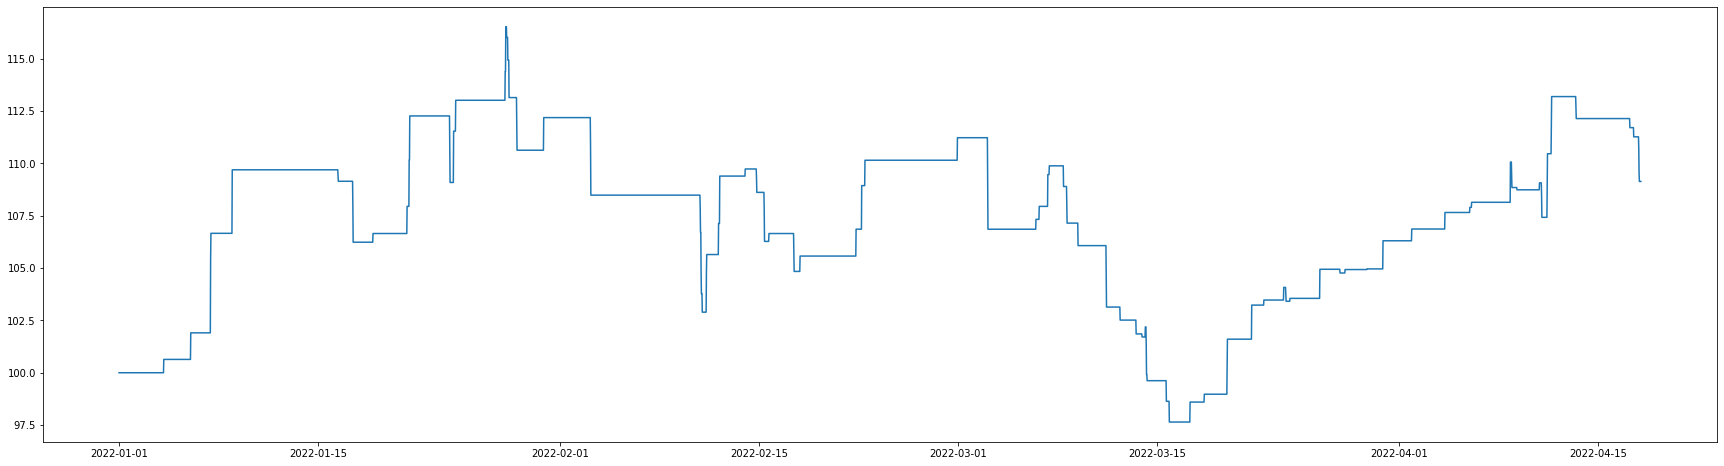

In [18]:
if reinvest_profit_flag == True:
    fig, ax = plt.subplots(figsize=(30, 8))
    ax.plot(budget_dict['time'], budget_dict['budget'])
else:
    print("Not reinvest profit")

In [19]:
if reinvest_profit_flag == True:
    print(f"Max drawdown: {round(max_drawdown * 100, 2)}%")

Max drawdown: 8.21%


In [20]:
win_rate = len(transaction_df[transaction_df['profit'] > 0]) / len(transaction_df)
print(f"Win rate: {round(win_rate * 100, 2)}%")

Win rate: 46.28%


In [21]:
for symbol in transaction_df['symbol'].unique():
    symbol_df = transaction_df[transaction_df['symbol'] == symbol]
    win_rate = len(symbol_df[symbol_df['profit'] > 0]) / len(symbol_df)
    print(f"{symbol} win rate: {round(win_rate * 100, 2)}%")

ETH-PERP win rate: 33.33%
LUNA-PERP win rate: 57.5%
SOL-PERP win rate: 50.0%


In [22]:
print(f"Distribution")
print(pd.DataFrame(transaction_df['profit_percent'].describe()))

Distribution
       profit_percent
count      121.000000
mean        -0.125548
std          3.658606
min         -8.335690
25%         -2.836165
50%         -0.973589
75%          2.271795
max         11.915476


In [23]:
for symbol in transaction_df['symbol'].unique():
    temp_return = transaction_df[transaction_df['symbol'] == symbol]['profit_percent']
    
    print(f"Distribution {symbol}:")
    print(pd.DataFrame(temp_return.describe()))
    print("\n")

Distribution ETH-PERP:
       profit_percent
count       45.000000
mean        -0.658213
std          2.792153
min         -5.466068
25%         -2.328224
50%         -1.383329
75%          0.773165
max          8.286675


Distribution LUNA-PERP:
       profit_percent
count       40.000000
mean         0.544843
std          4.114572
min         -6.055943
25%         -3.000405
50%          0.730752
75%          3.342442
max         11.915476


Distribution SOL-PERP:
       profit_percent
count       36.000000
mean        -0.204596
std          4.042596
min         -8.335690
25%         -3.874777
50%         -0.054491
75%          2.102549
max          8.742758




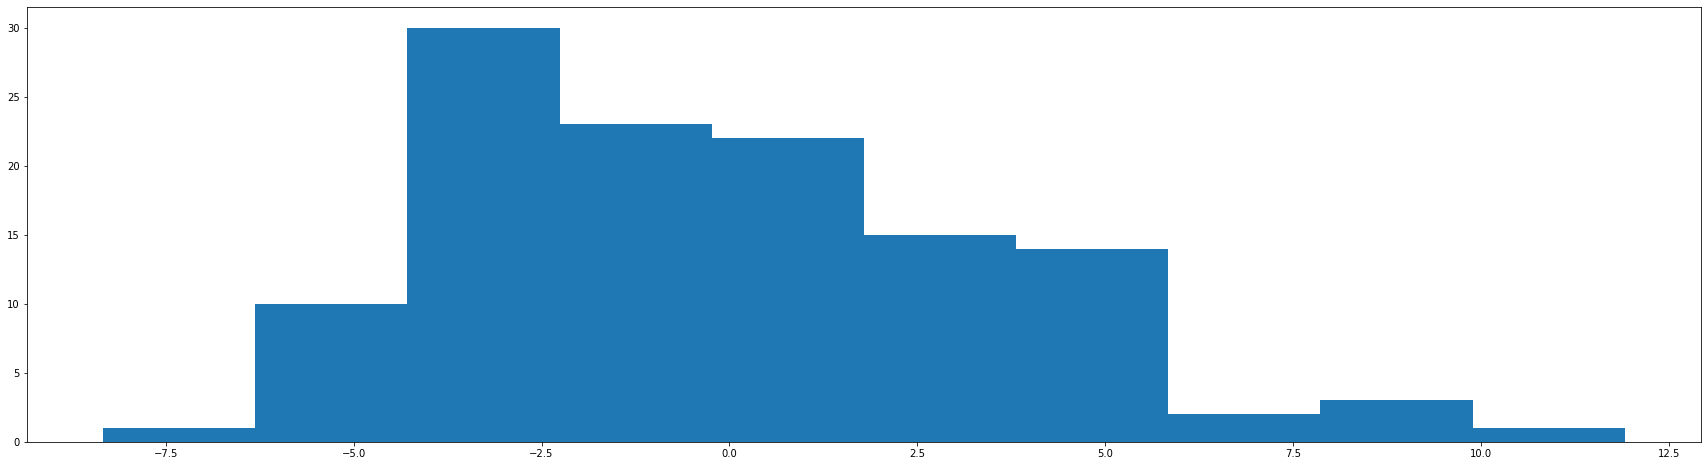

In [24]:
fig, ax = plt.subplots(figsize=(30, 8))
_ = ax.hist(transaction_df['profit_percent'], bins=10)